# Resampling And Regulaization

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
DATAPATH = 'data/Advertising.csv'

data = pd.read_csv(DATAPATH, index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
def scatter_plot(feature):
    plt.figure(figsize=(10, 5))
    plt.scatter(data[feature], data['sales'], c='white')
    plt.xlabel(f'Money spent on {feature} ads ($)')
    plt.ylabel('Sales (k$)')
    plt.show()

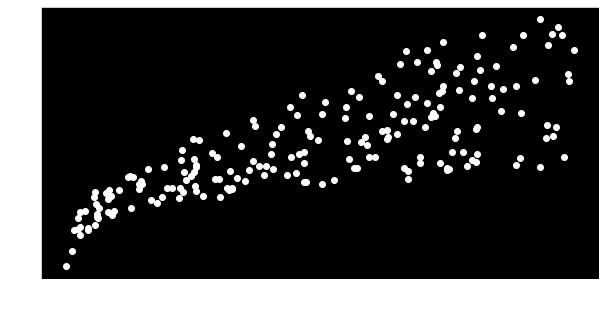

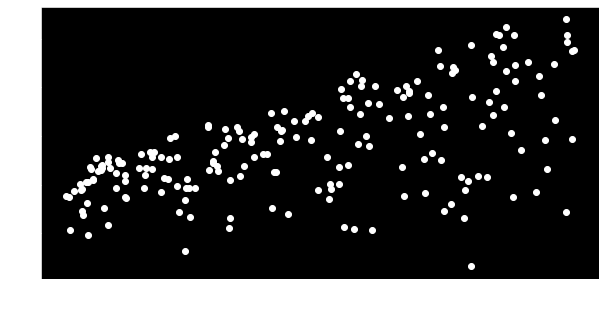

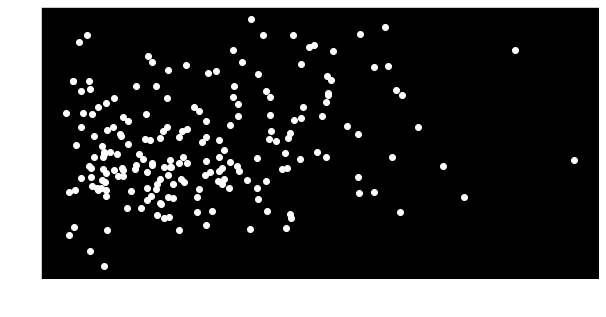

In [7]:
scatter_plot('TV')
scatter_plot('radio')
scatter_plot('newspaper')

## Baseline Model

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [9]:
X = data.drop(['sales'], axis=1)
Y = data['sales'].values.reshape(-1, 1)

In [10]:
lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, X, Y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print(-mean_MSE)

3.07294659710021


## Regularization

### Ridge Regression

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [14]:
ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [16]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 20}
3.072671338341143


### Lasso

In [17]:
from sklearn.linear_model import Lasso

In [20]:
lasso = Lasso(tol=0.05)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X, Y)

GridSearchCV(cv=5, estimator=Lasso(tol=0.05),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [21]:
print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 1}
3.0359983209111925
